AndrewNg 机器学习 week2 作业

多变量线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('ex1data2.txt',header = None,names = ['size','bedrooms','price'])
data

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


方法1：多变量梯度下降法

In [3]:
#特征归一化
data = (data - data.mean()) / data.std()
data.head()

#在X中添加一列全1数组
data.insert(0,'ones',1)
data

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389
5,1,-0.019732,1.090417,-0.323998
6,1,-0.587240,-0.223675,-0.204036
7,1,-0.721881,-0.223675,-1.130948
8,1,-0.781023,-0.223675,-1.026973
9,1,-0.637573,-0.223675,-0.783051


In [4]:
#变量初始化
cols = data.shape[1]
X = data.iloc[:,:-1]# X为data除去最后一列
y = data.iloc[:,cols-1:cols]# y为data的最后一列

#转化X，y由dataframe转化为矩阵，初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))


In [5]:
#计算代价函数J
def computeCost(X,y,theta):
    a = np.power((X*theta.T-y),2)
    cost = np.sum(a)/(2*len(y))
    return cost

#梯度下降法
def gradientDescent(X,y,theta,alpha,iter):
    m = len(y)
    cost = np.zeros(iter)
    temp = np.matrix(np.zeros(theta.shape))

    for i in range(iter):
        y_predicted = X*theta.T
        temp[0,0] = theta[0,0]-alpha*(1/m)*sum(y_predicted-y)
        temp[0,1] = theta[0,1]-alpha*(1/m)*sum(np.multiply(X[:,1],(y_predicted-y)))
        temp[0,2] = theta[0,2]-alpha*(1/m)*sum(np.multiply(X[:,2],(y_predicted-y)))
        theta = temp
        cost[i] = computeCost(X, y, theta)
        print(f"theta0 is:{theta[0,0]}")
        print(f"theta1 is:{theta[0,1]}")
        print(f"theta2 is:{theta[0,2]}")
        print(f"cost is:{cost[i]}")
    return theta,cost

In [6]:
alpha = 0.001
iter = 20000
theta,cost = gradientDescent(X,y,theta,alpha,iter) 
print(cost)

theta0 is:-8.740053598112934e-20
theta1 is:0.0008367963674977393
theta2 is:0.0004328513060479305
cost is:0.4884747465750354
theta0 is:-1.889741318510905e-19
theta1 is:0.0016725365173454998
theta2 is:0.0008648203616253595
cost is:0.48759031868064795
theta0 is:-2.740124911840812e-19
theta1 is:0.0025072219668082403
theta2 is:0.001295908609074732
cost is:0.4867084108858881
theta0 is:-3.6613738046148783e-19
theta1 is:0.003340854230875456
theta2 is:0.0017261174884952966
cost is:0.4858290156550767
theta0 is:-4.724353296277262e-19
theta1 is:0.004173434822264637
theta2 is:0.0021554484377465486
cost is:0.4849521254753965
theta0 is:-5.645602189051328e-19
theta1 is:0.005004965251424716
theta2 is:0.002583902892451667
cost is:0.48407773285682004
theta0 is:-6.519607548862621e-19
theta1 is:0.00583544702653952
theta2 is:0.003011482286000947
cost is:0.483205830332042
theta0 is:-7.606208807006391e-19
theta1 is:0.006664881653531204
theta2 is:0.0034381880495552262
cost is:0.4823364104564094
theta0 is:-8.40

可视化

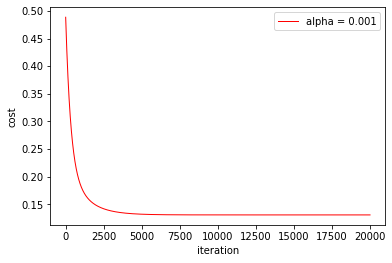

In [7]:
plt.plot(cost,'r',linewidth=1,label = 'alpha = 0.001')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()

方法二：正规方程组

In [8]:
def normal_equation(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    #X.T@X等价于X.T.dot(X)
    return theta    

normal_equation(X,y)

matrix([[-1.11022302e-16],
        [ 8.84765988e-01],
        [-5.31788197e-02]])

方法三：sickit-learn

In [10]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(data[['size','bedrooms']],data.price)  

print(reg.coef_)
print(reg.intercept_)

[ 0.88476599 -0.05317882]
-1.1568575416727602e-16
